# Dimerization in a 1D lattice

Construct the model (in a .py file) representing a one-dimensional Hubbard model with dimerization. The hopping terms are between nearest neighbors only, but they alternate between the value $t$ and the value $t'$.
Plot the spectral function for the case $t=1.1$ and $t'=0.9$, at $U=0$ and then $U=4$, at half-filling.
Compare the $U=0$ case with the analytic solution to the problem.

In [1]:
import pyqcm

# declare a cluster model of 2 sites, named 'clus'
CM = pyqcm.cluster_model( 2)  

# define a physical cluster based on that model, with base position (0,0,0) and site positions
clus = pyqcm.cluster(CM, ((0,0,0), (1,0,0))) 

# define a lattice model named '1D_4' made of the cluster(s) clus and superlattice vector (2,0,0), same as the lattice vector
model = pyqcm.lattice_model('1D_4', clus, ((2,0,0),), ((2,0,0),))

# define a few operators in this model
model.interaction_operator('U', orbitals=(1,1))
model.interaction_operator('U', orbitals=(2,2))
model.hopping_operator('t', (1,0,0), -1, orbitals=(1,2))
model.hopping_operator('tp', (1,0,0), -1, orbitals=(2,1))

Number of OpenMP threads = 8


In [2]:
model.set_target_sectors(['R0:N2:S0']) # 2 particles, total spin 0
model.set_parameters("""
t=1.1
tp=0.9
U=1e-9
mu=0.5*U
""")

'\nt=1.1\ntp=0.9\nU=1e-9\nmu=0.5*U\n'

### Non-interacting case $(U\simeq0)$

Ground state: [(-2.2000000004999998, 'R0:N2:S0:1')]
{'U': (0.24999999994318178, 0.062499999999999986), 'mu': (0.9999999999999997, 2.220446049250312e-16), 't': (-0.9999999999999998, 2.2204460492503126e-16)}


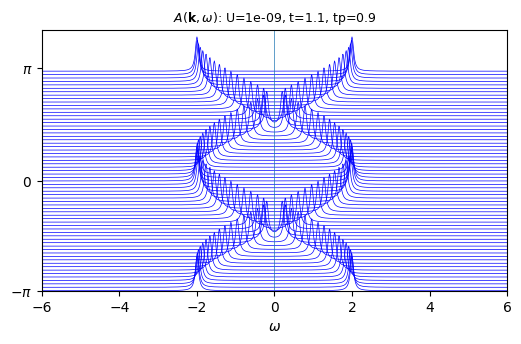

In [3]:
model.set_parameter("U", 1e-9) # To make sure correct U is used no matter execution order of cells
I = pyqcm.model_instance(model)
print(f"Ground state: {I.ground_state()}")
print(I.cluster_averages())
I.spectral_function(path="line") 

### Interacting case $(U=4)$

Ground state: [(-4.973213749463699, 'R0:N2:S0:1')]
{'U': (0.08183180150092191, 0.034219457013574664), 'mu': (0.9999999999999996, 4.440892098500624e-16), 't': (-0.7399400733959436, 0.45248868778280515)}


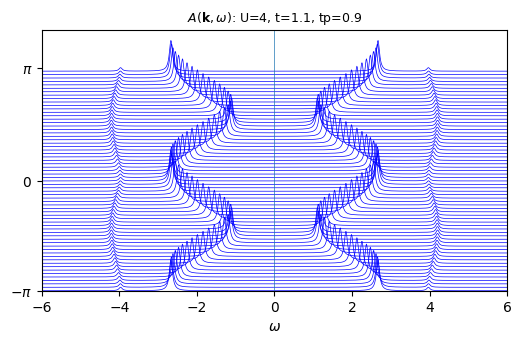

In [4]:
model.set_parameter('U', 4)
I = pyqcm.model_instance(model)
print(f"Ground state: {I.ground_state()}")
print(I.cluster_averages())
I.spectral_function(path="line") 

**From the above spectral functions, we can gather that:**
 - U=0: Small gap around $\omega = 0$: the dimerization gap. The system is a band insulator at half-filling.
 - U=4: Considerably larger gap. The system is a Mott insulator, on top of a band insulator.

**Let us compare with the analytical solution in the non-interacting case:**

Remember that:

$$t_{\alpha,\beta}(k) = \sum_{\delta}\operatorname{e}^{-ik\cdot\delta}t_{\alpha, \beta}(n,n+\delta)$$

Electrons can only jump between bands and therefore the diagonal is $t_{\alpha, \alpha}(k) = 0$. By requiring that $t_{\alpha, \beta}(k)$ be hermitian, we only need to calculate explicitely $t_{1,2}(k)$:

$$t_{1,2}(k) = t\operatorname{e}^{-ik} + t'\operatorname{e}^{ik} ~\Rightarrow~ t_{2,1}(k) = t\operatorname{e}^{ik} + t'\operatorname{e}^{-ik}$$

In matrix form:

$$t(k) = \begin{bmatrix}
    0 & t\operatorname{e}^{-ik} + t'\operatorname{e}^{ik} \\
    t\operatorname{e}^{ik} + t'\operatorname{e}^{-ik} & 0
\end{bmatrix}$$

This matrix admits two distinct eigenvalues:
$$
    \varepsilon_{\pm}(k) = \pm\sqrt{t^2 + 2tt'\operatorname{cos}(2k) + (t')^2}
$$
This is the dispersion function that can be plotted using Matplotlib (see below).

A different view would be to treat the two band as occupying the same site, this time with an inter-site distance of 2. In that case the hopping matrix is

$$t(k) = \begin{bmatrix}
    0 & t + t'\operatorname{e}^{2ik} \\
    t + t'\operatorname{e}^{-2ik} & 0
\end{bmatrix}$$

which leads to the same eigenvalues. The two versions of the hopping matrix only differ by a diagonal unitary transformation.

/var/folders/l5/bpxk4jj97_34g93z1yf582m80000gq/T/ipykernel_86044/1551230466.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


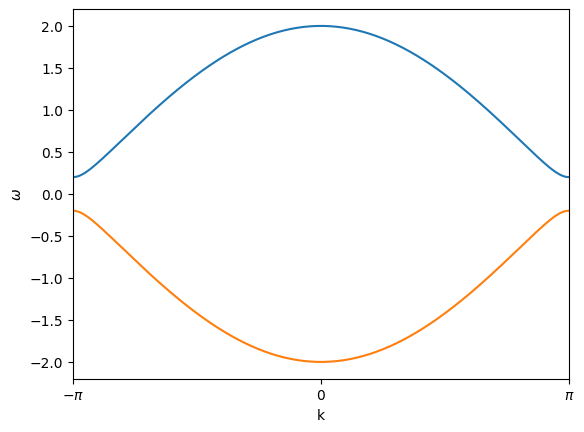

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Defining the energy eigenvalue function
def dispersion(k, t, t_prime):
    return np.sqrt( t*t + 2*t*t_prime*np.cos(2*k) + t_prime*t_prime )

# Divide by 2 to have the correct Brillouin zone
k_grid = np.linspace(-np.pi/2, np.pi/2, 300)

fig, ax = plt.subplots()

ax.plot(k_grid, dispersion(k_grid, 1.1, 0.9))
ax.plot(k_grid, -dispersion(k_grid, 1.1, 0.9))

ax.set_xlabel("k")
ax.set_ylabel("$\omega$")

ax.set_xticks([-np.pi/2, 0, +np.pi/2])
ax.set_xticklabels(["$-\pi$", "0", "$\pi$"])

ax.set_xlim((-np.pi/2, np.pi/2))

fig.show()

The solution is identical, as expected.